In [1]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  1


In [2]:
import numpy as np

In [3]:
from tensorflow import keras
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.models import Sequential, load_model

In [4]:
pwd

'D:\\projects\\Personal\\Fraudulent-Signature-Detection\\model_testing'

In [5]:
from numpy import load
X_val=load('../data/X_val.npy')
y_val=load('../data/y_val.npy')

In [6]:
X_val.shape,y_val.shape

((4900, 256, 512, 3), (4900, 1))

In [7]:
model=load_model("../model/saved_models/xcep_try1_ft4.h5")

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 512, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 16, 2048)       20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
acc=model.evaluate(X_val[:4500],y_val[:4500],batch_size=16)

In [ ]:
print(f"model accuracy tested on {len(y_val[:4500])} samples is {round(acc[1]*100,3)}%")
print(f"model loss is {acc[0]}")

In [9]:
predicted_y_val= tf.round(tf.nn.sigmoid(model.predict(X_val[:4500])))

In [12]:
from sklearn.metrics import confusion_matrix

In [27]:
cm=confusion_matrix(y_val[:4500],predicted_y_val[:4500])
print(f"confusion matrix is \n {cm}")

confusion matrix is 
 [[2052   38]
 [  50 2360]]


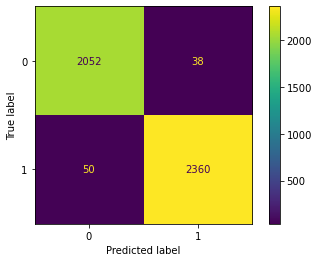

In [19]:
import sklearn
vis=sklearn.metrics.ConfusionMatrixDisplay(cm)
vis.plot()
# vis.show()

In [22]:
precision=sklearn.metrics.precision_score(y_val[:4500],predicted_y_val[:4500])
print(f"precision score is {precision}")

precision score is 0.9841534612176814


In [24]:
recall=sklearn.metrics.recall_score(y_val[:4500],predicted_y_val[:4500])
print(f"recall score is {recall}")

recall score is 0.979253112033195


In [25]:
f1s=sklearn.metrics.f1_score(y_val[:4500],predicted_y_val[:4500])
print(f"F1 score is {f1s}")

F1 score is 0.9816971713810315


In [ ]:
# acc

In [ ]:
# model1=model.layers[:5]

In [ ]:
# model1

In [ ]:
# from keras.models import Model

# model2= Model(inputs=model.input, outputs=model.layers[-2].output)

In [ ]:
# model2.summary()